In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches

from jessesort import *

np.set_printoptions(linewidth=150)
%matplotlib inline

In [2]:
# Generate 5 sorted arrays (for illustration purposes)
arrays = [np.sort(np.random.randint(20-(s*4), 60+(s*4), size=np.random.randint(3,8))) for s in range(5)]

# Reorder arrays based on the first value of each array in ascending order
arrays.sort(key=lambda arr: arr[0])

# Function to add random elements to an array until a condition is met
def add_elements(arr1, arr2):
    while arr1[-1] <= arr2[-1]:
        arr1 = np.append(arr1, np.random.randint(arr1[-1], arr2[-1]+10))
        arr1.sort()
    return arr1

# Add elements to arrays in the required order
arrays[3] = add_elements(arrays[3], arrays[4])
arrays[2] = add_elements(arrays[2], arrays[3])
arrays[1] = add_elements(arrays[1], arrays[2])
arrays[0] = add_elements(arrays[0], arrays[1])
arrays.reverse()

print(arrays)

[array([30, 39, 48, 52, 53, 68]), array([21, 24, 32, 37, 45, 75]), array([20, 39, 46, 52, 53, 58, 60, 70, 75, 82]), array([18, 22, 31, 54, 57, 63, 64, 77, 86]), array([ 7, 19, 23, 51, 58, 67, 87])]


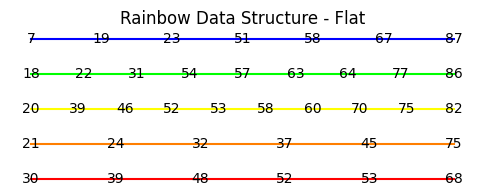

In [3]:
# Display the arrays with different color bands

# Set colors for the rainbow effect
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF']

# Determine the global first and last x positions (based on the longest array)
max_len = max(len(arr) for arr in arrays)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))

# Plot lines and values
for i, arr in enumerate(arrays):
    num_points = len(arr)

    # Ensure first and last x values align across arrays
    x_positions = np.linspace(0, max_len - 1, num_points)  # X positions with alignment
    y_positions = np.ones_like(arr) * i  # Apply y offset for vertical positioning

    # Connect values with straight lines between them
    ax.plot(x_positions, y_positions, color=rainbow_colors[i], label=f'Array {i+1}')
    
    # Add text for the values (using the subarray values)
    for j, value in enumerate(arr):
        ax.text(x_positions[j], y_positions[j], str(value), color="black", ha='center', va='center', fontsize=10)

# Customize the plot
ax.set_yticks(range(5))
ax.set_yticklabels([f'Array {i+1}' for i in range(5)])
ax.set_xlabel('Index')
ax.set_title('Rainbow Data Structure - Flat')

# Remove axes
ax.axis('off')

# Display the plot
plt.show()

# Save it
fig.savefig("images/rainbow_flat.png", bbox_inches="tight")

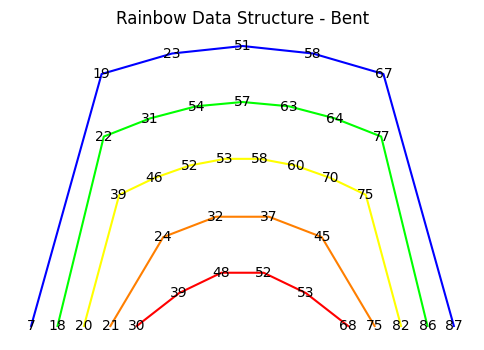

In [4]:
# Bend the arrays into a rainbow

# Set colors for the rainbow effect
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF']

# Determine the global first and last x positions (based on the longest array)
max_len = max(len(arr) for arr in arrays)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bending effect using a sine function for both x and y
for i, arr in enumerate(arrays):
    num_points = len(arr)

    # Create symmetrical bending using sine wave for both x and y
    # Ensure first and last x values align across arrays
    x_positions = np.linspace(1-i, max_len - 1 + i, num_points)  # X positions with alignment
    y_offset = np.sin(np.linspace(0, np.pi, num_points))  # Apply bending to y-axis
    y_positions = np.ones_like(arr) * i + y_offset  # Apply y offset for vertical positioning
    y_positions[0] = 0
    y_positions[-1] = 0

    # Connect values with straight lines between them
    ax.plot(x_positions, y_positions, color=rainbow_colors[i], label=f'Array {i+1}')
    
    # Add text for the values (using the subarray values)
    for j, value in enumerate(arr):
        ax.text(x_positions[j], y_positions[j], str(value), color="black", ha='center', va='center', fontsize=10)

# Customize the plot
ax.set_yticks(range(5))
ax.set_yticklabels([f'Array {i+1}' for i in range(5)])
ax.set_xlabel('Index')
ax.set_title('Rainbow Data Structure - Bent')

# Remove axes
ax.axis('off')

# Display the plot
plt.show()

# Save it
fig.savefig("images/rainbow_bent.png", bbox_inches="tight")

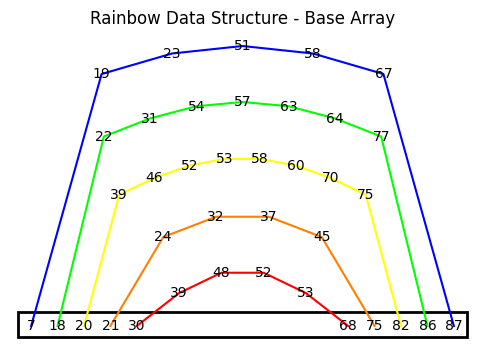

In [11]:
# Bend the arrays into a rainbow, identify the base array

# Set colors for the rainbow effect
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF']

# Determine the global first and last x positions (based on the longest array)
max_len = max(len(arr) for arr in arrays)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bending effect using a sine function for both x and y
for i, arr in enumerate(arrays):
    num_points = len(arr)

    # Create symmetrical bending using sine wave for both x and y
    # Ensure first and last x values align across arrays
    x_positions = np.linspace(1-i, max_len - 1 + i, num_points)#[:num_points]  # X positions with alignment
    y_offset = np.sin(np.linspace(0, np.pi, num_points))  # Apply bending to y-axis
    y_positions = np.ones_like(arr) * i + y_offset  # Apply y offset for vertical positioning
    y_positions[0] = 0
    y_positions[-1] = 0

    # Connect values with straight lines between them
    ax.plot(x_positions, y_positions, color=rainbow_colors[i], label=f'Array {i+1}')
    
    # Add text for the values (using the subarray values)
    for j, value in enumerate(arr):
        #ax.text(x_positions[j], y_positions[j], str(value), color=rainbow_colors[i], ha='center', va='center', fontsize=10)
        ax.text(x_positions[j], y_positions[j], str(value), color="black", ha='center', va='center', fontsize=10)

# Customize the plot
ax.set_yticks(range(5))
ax.set_yticklabels([f'Array {i+1}' for i in range(5)])
ax.set_xlabel('Index')
ax.set_title('Rainbow Data Structure - Base Array')

# Define the rectangle (x=0 to x=100, y=-5 to y=5)
width = 17  # TODO: Find out matplotlib formula, adjust manually for now
rect = patches.Rectangle((-3.5, -0.2), width, 0.45, edgecolor='black', facecolor='none', linewidth=2)

# Add the rectangle to the plot
ax.add_patch(rect)

# Remove axes
ax.axis('off')

# Display the plot
plt.show()

# Save it
fig.savefig("images/rainbow_bent_base_array.png", bbox_inches="tight")

705 bands
92.95886524822696 mean band length
102.0 median band length


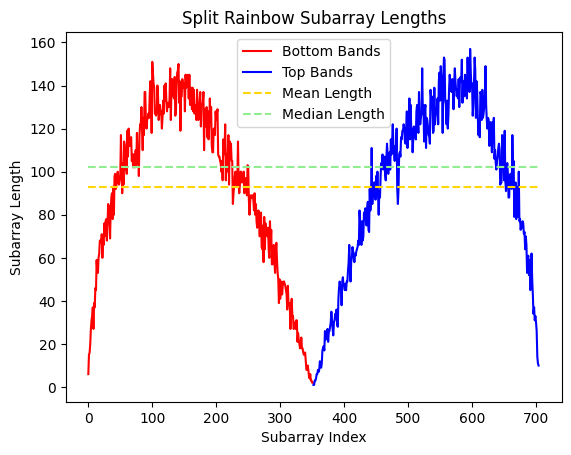

In [6]:
# Display the subarray lengths

size = 2**16
vals = [random.randint(0, size) for x in range(size)]
arr_values = sorted(vals[:2])
split_rainbow = [[arr_values[0]], [arr_values[1]]]
mid = 0
for target in vals[2:]:
    split_rainbow, arr_values, mid = jessesort_with_split_lists_and_value_array(split_rainbow, arr_values, mid, target)

print(len(split_rainbow), "bands")
lens = [len(x) for x in split_rainbow]
mean = np.mean(lens)
median = np.median(lens)
print(mean, "mean band length")
print(median, "median band length")
xs = [x for x in range(len(lens))]
fig = plt.figure()
plt.plot(xs[:len(lens)//2], lens[:len(lens)//2], color="red", label="Bottom Bands")
plt.plot(xs[len(lens)//2:], lens[len(lens)//2:], color="blue", label="Top Bands")
plt.hlines(mean, 0, len(split_rainbow), linestyle="dashed", color="gold", label="Mean Length")
plt.hlines(median, 0, len(split_rainbow), linestyle="dashed", color="lightgreen", label="Median Length")
plt.title("Split Rainbow Subarray Lengths")
plt.xlabel("Subarray Index")
plt.ylabel("Subarray Length")
plt.legend()
plt.show()
fig.savefig("images/subarray_lengths.png", bbox_inches="tight")

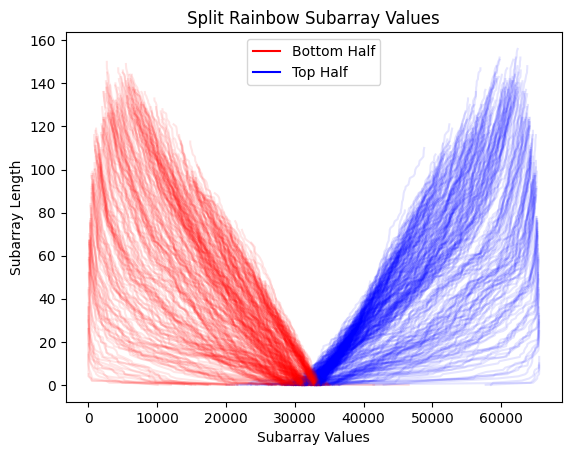

In [7]:
fig = plt.figure()
for i in range(len(split_rainbow)//2):
    plt.plot(split_rainbow[i], range(len(split_rainbow[i])), color="red", alpha=0.1, label="Bottom Half")
    plt.plot(split_rainbow[-i-1], range(len(split_rainbow[-i-1])), color="blue", alpha=0.1, label="Top Half")
plt.title("Split Rainbow Subarray Values")
plt.xlabel("Subarray Values")
plt.ylabel("Subarray Length")

# Remove redundant labels, change alpha value
legend_lines = [
    Line2D([0], [0], color="red", alpha=1, linestyle="-", lw=1.5, label="Bottom Half"),
    Line2D([0], [0], color="blue", alpha=1, linestyle="-", lw=1.5, label="Top Half"),
]
plt.legend(handles=legend_lines)
plt.show()
fig.savefig("images/subarray_values.png", bbox_inches="tight")

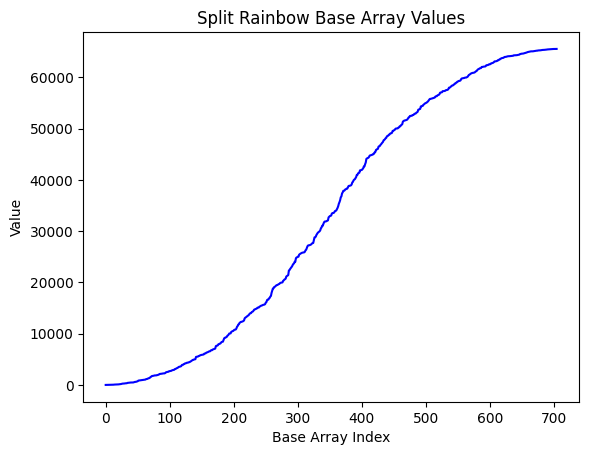

In [8]:
# Display the base array values

fig = plt.figure()
plt.plot(range(len(arr_values)), arr_values, color="blue")
plt.title("Split Rainbow Base Array Values")
plt.xlabel("Base Array Index")
plt.ylabel("Value")
plt.show()
fig.savefig("images/base_array.png", bbox_inches="tight")

In [9]:
for target in range(11):
    node1 = Node(1)
    node9 = node1.add_next(9)
    node3 = Node(3)
    node7 = node3.add_next(7)
    node5 = Node(5)
    #arr_nodes = [node1, node3, node7, node9]
    arr_nodes = [node1, node3, node5, node7, node9]
    mid = 0
    comparisons = 0
    overhead = 0
    res = jessesort_with_nodes(arr_nodes, mid, target)
    print(target, [x.data for x in res[0]], *res[1:])

0 [0, 3, 5, 7, 9] 0
1 [1, 3, 5, 7, 9] 0
2 [1, 2, 5, 7, 9] 1
3 [1, 3, 5, 7, 9] 1
4 [1, 3, 4, 5, 7, 9] 2
5 [1, 3, 5, 5, 7, 9] 3
6 [1, 3, 5, 6, 7, 9] 3
7 [1, 3, 5, 7, 9] 3
8 [1, 3, 5, 8, 9] 3
9 [1, 3, 5, 7, 9] 4
10 [1, 3, 5, 7, 10] 4


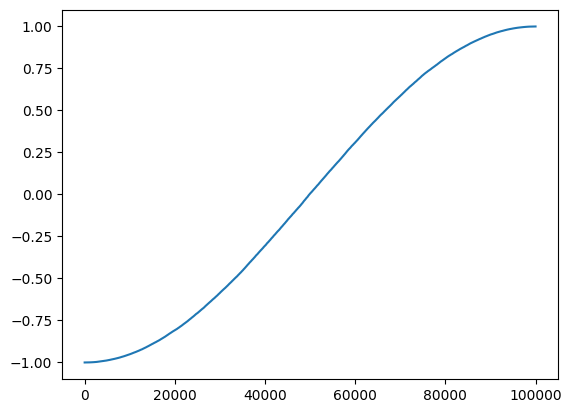

In [10]:
size = 100000
unsorted_array = [np.cos(random.randint(1,size)) for _ in range(size)]
sorted_array = jessesort(unsorted_array)
plt.plot(sorted_array)
plt.show()